The LMR database of Common ERA records includes data in the PAGES2k phases 2 and 3 compilations as well as additional records collected from NCDC.


In [275]:
%matplotlib inline

import os
import cPickle
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

figdir = 'Figs/'

proxy_pandas_metafile = 'NCDC_v0.1.0all_Metadata.df.pckl'
proxy_pandas_datafile = 'NCDC_v0.1.0all_Proxies.df.pckl'

proxy_meta = pd.read_pickle(proxy_pandas_metafile)
proxy_data = pd.read_pickle(proxy_pandas_datafile)
lat = proxy_meta['Lat (N)'].values
lon = proxy_meta['Lon (E)'].values
oldest = proxy_meta['Oldest (C.E.)'].values




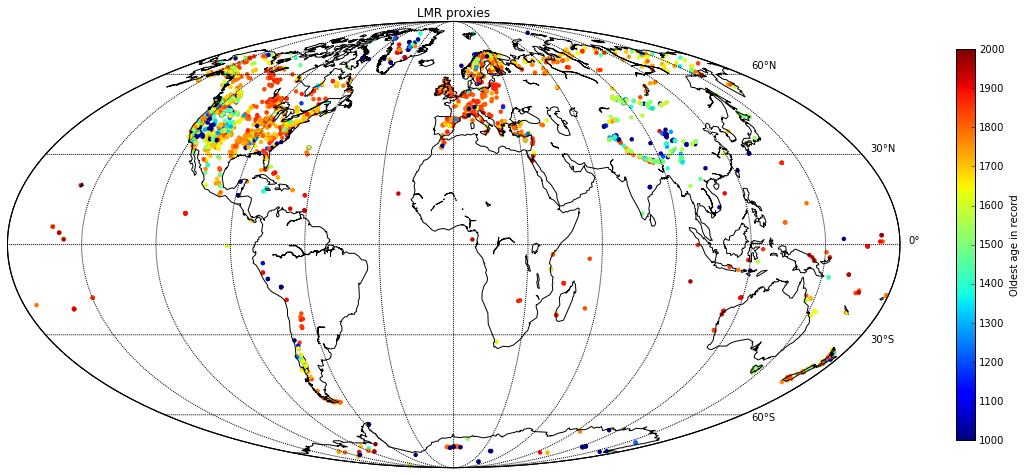

In [4]:
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = m(lon,lat)
sc = plt.scatter(x,y, c=oldest,edgecolors='none',vmin=1000, vmax =2000, cmap='jet', s=20)
cbar = plt.colorbar(sc, shrink = .7)
cbar.set_label('Oldest age in record')
m.drawcoastlines()
plt.title('LMR proxies')
plt.show();

This figure of the PAGES2k data from Saenger shows more marine records:


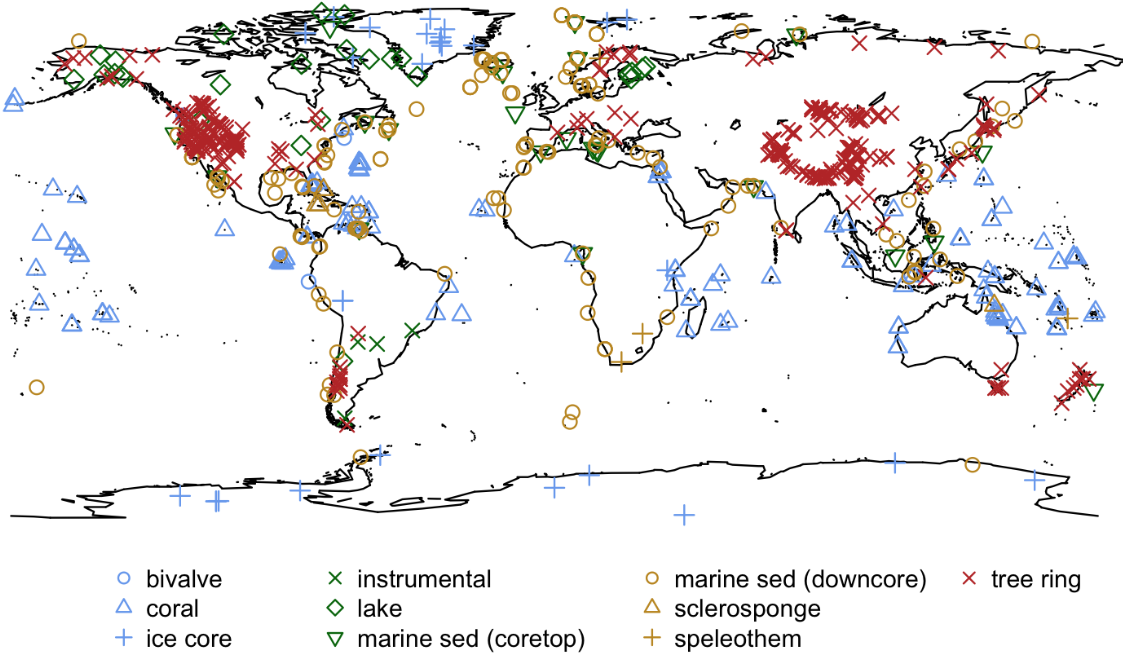

In [166]:
from IPython.display import Image
Image(filename = "pages2kfromsaenger.png")


In [53]:
# Find annually resolved records spanning between 1700 and 1900. Where are they? How many are there?
#y17 = (proxy_meta['Oldest (C.E.)']<1700).tolist and  (proxy_meta['Youngest (C.E.)']>1900).tolist

pm2 = proxy_meta[(proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1)]

lat2 = pm2['Lat (N)'].values
lon2 = pm2['Lon (E)'].values
res2 = pm2['Resolution (yr)'].values
oldest2 = pm2['Oldest (C.E.)'].values


These are records spanning between 1750 and 1900 with annual resolution. They are mostly from tree rings.

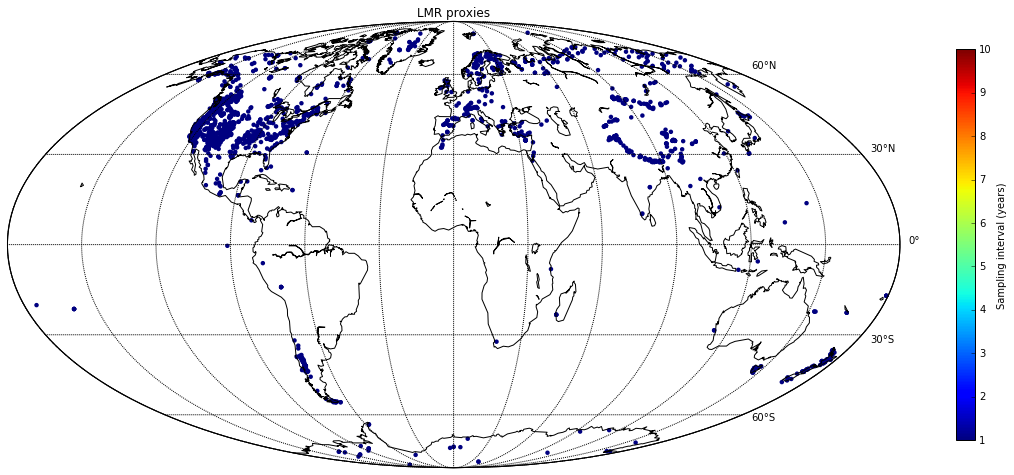

In [10]:
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = m(lon2,lat2)
sc = plt.scatter(x,y, c=res2,edgecolors='none',vmin=1, vmax =10, cmap='jet', s=20)
cbar = plt.colorbar(sc, shrink = .7)
cbar.set_label('Sampling interval (years)')
m.drawcoastlines()
plt.title('LMR proxies')
plt.show();

In [225]:
# Append grid location information to the data metafile

# Define a grid
RES = 4;
lon_g = np.linspace(0,360,num=360/RES +1)
lat_g = np.linspace(-90,90,num=180/RES +1)

# Define a new metadata file that has grid coordinates for this resolution choice
proxy_meta_g4 = proxy_meta;

proxy_meta_g4['lat_ind'] = np.ones(len(proxy_meta_g4['NCDC ID']))*np.nan
proxy_meta_g4['lon_ind'] = np.ones(len(proxy_meta_g4['NCDC ID']))*np.nan

## Determine lat_ind and lon_ind for every record

# List of proxy sites
site_list = list(proxy_data.columns.values)

# Loop over sites
#for site in site_list:
#    site_meta = proxy_meta[proxy_meta['NCDC ID'] == site]
#    lon_s = site_meta['Lon (E)'].iloc[0]
#    lat_s = site_meta['Lat (N)'].iloc[0]
#    proxy_meta_g4.set_value(site,'lat_ind',4)

for index, row in proxy_meta_g4.iterrows():
    lon_s = row['Lon (E)']
    lat_s = row['Lat (N)']
    lat_ind = np.digitize(lat_s,lat_g,right=True)
    lon_ind = np.digitize(lon_s,lon_g,right=True)
    proxy_meta_g4.set_value(index,'lat_ind',lat_ind)
    proxy_meta_g4.set_value(index,'lon_ind',lon_ind)



In [284]:
##### EOFs of just the normalized data over an interval (no averaging)

# Pick out records that meet some coverage criteria
# For now, I want records with annual resolution with coverage between 1800 and 1900 (2000?)
# Decide later whether to eliminate records that don't span the duration

# Establish some criteria from the meta data for which records are included
crit = (proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1);

proxy_datat = proxy_data.transpose()

test = (proxy_data.columns.values)
test = (proxy_data.columns[crit])
test1 = proxy_data[test].loc[1800:2000]
test1
#test1 = pd.DataFrame(test[crit])
#test1

# Want this to give a df of records matching the crit:
#test = proxy_data[pd.DataFrame(crit)]
#test = proxy_data[crit]

# Gives a df of records matching the crit and the year range
#test = proxy_data[pd.DataFrame(np.transpose(crit))].loc[1800:2000]

# Gives a matrix of records matching the crit and the year range
# test = proxy_data[pd.DataFrame(crit)]#.values[1800:2000]

# syntax: df['column name' or dataframe].values[start:end]


00ITAS03:d18O  00LawD01:d18O  00berm01b:d18O  01cpac01a:d18O  \
Year C.E.                                                                 
1800.0        -42.639360       -22.2359             NaN             NaN   
1801.0        -44.077936       -21.9264             NaN             NaN   
1802.0        -42.677356       -22.7182             NaN             NaN   
1803.0        -42.380611       -22.0810             NaN             NaN   
1804.0        -43.023778       -24.1500             NaN             NaN   
1805.0        -43.710929       -22.2808             NaN             NaN   
1806.0        -42.447067       -22.1541             NaN             NaN   
1807.0        -44.814440       -23.3892             NaN             NaN   
1808.0        -43.922962       -23.4284             NaN             NaN   
1809.0        -42.845240       -22.6351             NaN             NaN   
1810.0        -44.475536       -21.9860             NaN             NaN   
1811.0        -42.640240       -22.6419             NaN             NaN   
1812.0        -42.990800       -21.7067             NaN             NaN   
1813.0        -43.778356       -21.7902             NaN             NaN   
1814.0        -43.225513       -21.9451             NaN             NaN   
1815.0        -43.710880       -22.3417             NaN             NaN   
1816.0        -44.878791       -22.8121             NaN             NaN   
1817.0        -44.312743       -23.3461             NaN             NaN   
1818.0        -42.033414       -22.8373             NaN             NaN   
1819.0        -40.897500       -21.9834             NaN             NaN   
1820.0        -41.843338       -23.3027             NaN             NaN   
1821.0        -42.885333       -22.2601             NaN             NaN   
1822.0        -42.643237       -22.9072             NaN             NaN   
1823.0        -43.658243       -22.8112             NaN             NaN   
1824.0        -46.075862       -21.7781             NaN             NaN   
1825.0        -43.340533       -22.2651             NaN             NaN   
1826.0        -41.192833       -21.9115             NaN             NaN   
1827.0        -43.286550       -22.0181             NaN             NaN   
1828.0        -42.811786       -21.8853             NaN             NaN   
1829.0        -42.953143       -21.0543             NaN             NaN   
...                  ...            ...             ...             ...   
1971.0        -44.015718       -22.4258             NaN       -4.724167   
1972.0        -43.121325       -22.4106             NaN       -5.078333   
1973.0        -41.483318       -22.7375             NaN       -4.710833   
1974.0        -44.332500       -21.3997             NaN       -4.828333   
1975.0        -44.573420       -20.6353             NaN       -4.700833   
1976.0        -44.048586       -22.8407             NaN       -4.989167   
1977.0        -44.888174       -21.1882             NaN       -4.956667   
1978.0        -41.218180       -22.9449             NaN       -4.947500   
1979.0        -44.131006       -22.5583             NaN       -5.087500   
1980.0        -47.398850       -22.2687             NaN       -5.121667   
1981.0        -42.131700       -21.9125             NaN       -5.028333   
1982.0        -42.863583       -21.7452             NaN       -5.110000   
1983.0        -43.146725       -21.6982             NaN       -5.019167   
1984.0        -46.347025       -21.2915             NaN       -4.901667   
1985.0        -43.376610       -22.5912             NaN       -5.001667   
1986.0        -45.404955       -23.1174             NaN       -5.250833   
1987.0        -42.096244       -23.0747             NaN       -5.230000   
1988.0        -41.747035       -21.2233             NaN       -4.975833   
1989.0        -42.722523       -21.9105             NaN       -5.027500   
1990.0        -41.344271       -23.4321             NaN       -5.207500   
1991.0        -43.089407       -22.2

In [ ]:
## Pick out records that meet some coverage criteria
# For now, I want records with annual resolution with coverage between 1800 and 1900 (2000?)
# Decide later whether to eliminate records that don't span the duration

# Establish some criteria from the meta data for which records are included
crit = [(proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1)];

# Make a subset dataframe of the records to loop over when computing averages

# initialize gridded average field

G = np.nan*np.ones(len(lat_g)-1,len(lon_g)-1)

# Loop over grid lat
# Loop over grid lon


# Normalize records
# Average within the grid
# SVD of gridded data

In [ ]:

test

#pm22 = proxy_meta.iloc[pd.DataFrame(np.transpose(test))]
#proxy_datat = proxy_data.transpose()
#m = pd2.values

#pd2 = proxy_datat.iloc[pd.DataFrame(test)]
proxy_data[test]

In [263]:
# What does the SV spectrum of those (normalized!) records look like?
test = [(proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1)];


#pm22 = proxy_meta.iloc[pd.DataFrame(np.transpose(test))]
#proxy_datat = proxy_data.transpose()
#m = pd2.values

#pd2 = proxy_datat.iloc[pd.DataFrame(test)]
#pd2 = proxy_datat[test]
#proxy_data[test].values[1800:2000]

# df['column name'].values[start:end]


In [ ]:
# What about for different (smoothed?) box averaging?
# What about for different regions?

In [280]:
whos 

Variable                 Type              Data/Info
----------------------------------------------------
Basemap                  type              <class 'mpl_toolkits.basemap.Basemap'>
RES                      int               4
ans                      ndarray           : 1 elems, type `int64`, 8 bytes
cPickle                  module            <module 'cPickle' from '/<...>/lib-dynload/cPickle.so'>
cbar                     Colorbar          <matplotlib.colorbar.Colo<...>ar object at 0x11957e350>
colors                   module            <module 'matplotlib.color<...>s/matplotlib/colors.pyc'>
crit                     Series            0       False\n1       Fa<...>008     True\ndtype: bool
figdir                   str               Figs/
from_levels_and_colors   function          <function from_levels_and_colors at 0x10e7e2488>
go                       module            <module 'plotly.graph_obj<...>graph_objs/__init__.pyc'>
index                    str               southamerica